In [12]:
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

In [18]:
df=pd.read_csv(r'C:\Users\cleme\Desktop\IronHack\Projet Final\data\prophet7.csv')
df

,ad_creation_date,dollar_price
0,2016-03-03,6632.608924
1,2016-03-04,6148.519097
2,2016-03-05,6077.397306
3,2016-03-06,6276.040844
4,2016-03-07,6153.766840
5,2016-03-08,6008.678721
6,2016-03-09,6094.687628
7,2016-03-10,5943.518377
8,2016-03-11,6018.559183
9,2016-03-12,6098.860634


In [49]:
stepwise_fit = pm.auto_arima(df['dollar_price'], start_p=0, 
                             start_q=0, m=7, max_p=30, max_q=30, seasonal=True, 
                             trace=True, error_action='ignore',
                             suppress_warnings=True, 
                             stepwise=True, scoring='mse')

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=469.377, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=470.253, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=469.051, Time=0.14 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=inf, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=468.255, Time=0.01 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=469.162, Time=0.07 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=470.306, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=469.698, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[7] intercept   : AIC=inf, Time=0.19 sec

Best model:  ARIMA(0,1,0)(0,0,0)[7]          
Total fit time: 1.078 seconds


In [35]:
# in order and seasonal order put what you got from above and at the end what you
# put in for m, in this case 15
opt = ARIMA(df['dollar_price'], order=(0,1,0), seasonal_order=(1,0,0,7))
rm_opt = opt.fit()
print(rm_opt.summary())

                                    SARIMAX Results                                    
Dep. Variable:                    dollar_price   No. Observations:                   36
Model:             ARIMA(0, 1, 0)x(1, 0, 0, 7)   Log Likelihood                -231.590
Date:                         Thu, 08 Dec 2022   AIC                            467.181
Time:                                 16:37:12   BIC                            470.292
Sample:                                      0   HQIC                           468.255
                                          - 36                                         
Covariance Type:                           opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.3075      0.148      2.071      0.038       0.016       0.598
sigma2      3.132e+04   7411.610      4.226      0.000    1

In [36]:
print(mean_squared_error(df['dollar_price'], rm_opt.predict()))

1254138.3067116062


In [37]:
rm_opt.forecast(steps=18)

36    6761.865590
37    6732.382252
38    6749.737677
39    6741.560625
40    6732.712946
41    6766.901196
42    6792.086054
43    6814.444190
44    6805.378724
45    6810.715129
46    6808.200868
47    6805.480405
48    6815.992526
49    6823.736305
50    6830.610930
51    6827.823503
52    6829.464328
53    6828.691249
Name: predicted_mean, dtype: float64

<AxesSubplot:xlabel='ad_creation_date', ylabel='dollar_price'>

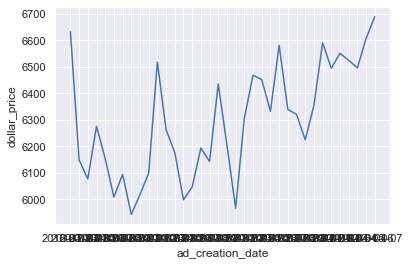

In [31]:
# Plot the responses for different events and regions
sns.lineplot(x="ad_creation_date", y="dollar_price", data=df)

In [44]:
df_arima=pd.read_csv(r'C:\Users\cleme\Desktop\IronHack\Projet Final\data\arima prediction - prophet.csv')
df_arima

,ad_creation_date,dollar_price_arima,dollar_price
0,2016-03-03,6632.608924,6632.608924
1,2016-03-04,6148.519097,6148.519097
2,2016-03-05,6077.397306,6077.397306
3,2016-03-06,6276.040844,6276.040844
4,2016-03-07,6153.766840,6153.766840
5,2016-03-08,6008.678721,6008.678721
6,2016-03-09,6094.687628,6094.687628
7,2016-03-10,5943.518377,5943.518377
8,2016-03-11,6018.559183,6018.559183
9,2016-03-12,6098.860634,6098.860634


<Figure size 1440x1440 with 0 Axes>

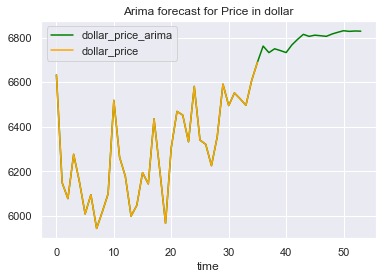

In [56]:
# Visualizing The Price of the stocks
# to set the plot size
plt.figure(figsize=(20, 20))
  
# using .plot method to plot stock prices.
# we have passed colors as a list
df_arima.plot(label='arima', color=['green', 'orange'])
  
# adding title
plt.title('Arima forecast for Price in dollar')

# adding label to x-axis
plt.xlabel('time')
  
# adding legend.
plt.legend()